### Load and split the dataset
- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.
- Separate the features and target and then split the train data into train and validation set.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_train.tail()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
8577,29,152.4878,13,955,4.1,0,3.7,10,3.0,13,8577
8578,19,18.2878,0,119,0.0,5,0.0,17,0.0,6,8578
8579,23,36.5878,6,76,4.2,2,4.5,12,3.4,15,8579
8580,0,12.1878,3,119,4.5,2,5.0,4,4.5,13,8580
8581,23,11.6922,1,56,4.0,2,5.0,12,5.0,3,8581


In [3]:
df_train.columns

Index(['ages', 'list_price', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating',
       'country', 'Id'],
      dtype='object')

In [34]:
# Code starts here
df_train = pd.read_csv("train.csv")
df_train.head()

X = df_train[['ages', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating',
       'country', 'Id']]

y = df_train.iloc[:,1] #list_price column
#y = df_train.list_price

from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X, y, test_size = 0.3,random_state = 6)

print(X_train.shape)
print(y_train.shape)
# Code ends here.

(6007, 10)
(6007,)


### Data Visualization

- All the features including target variable are continuous. 
- Check out the best plots for plotting between continuous features and try making some inferences from these plots. 

In [40]:
cols

Index(['ages', 'list_price', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating',
       'country', 'Id'],
      dtype='object')

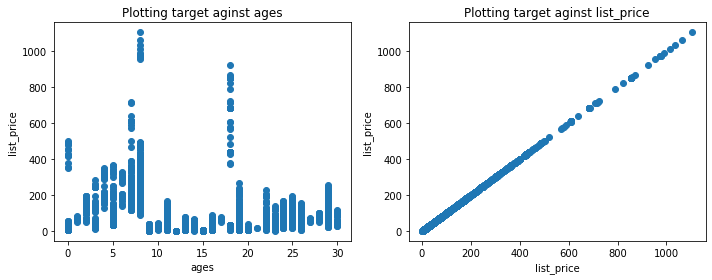

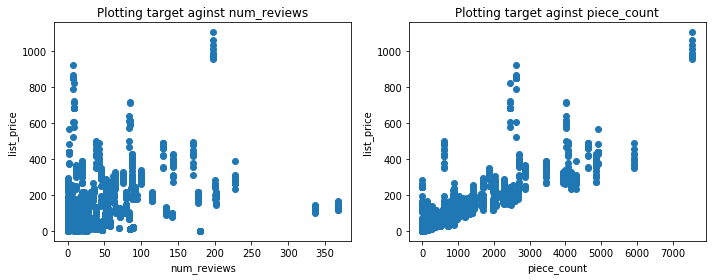

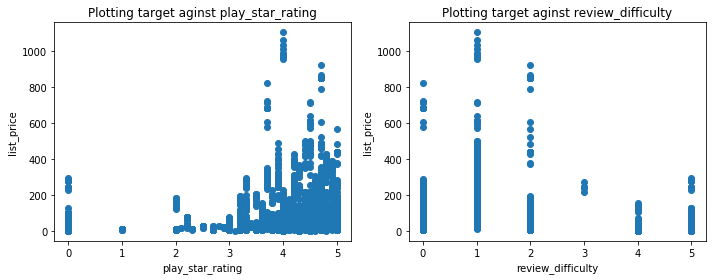

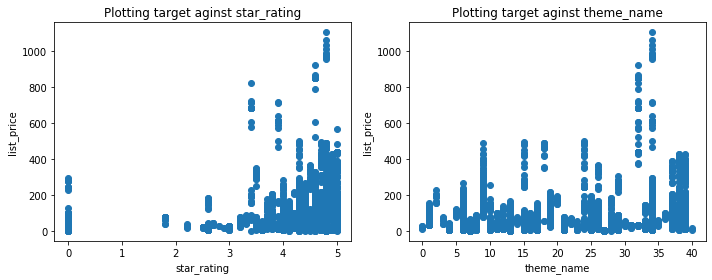

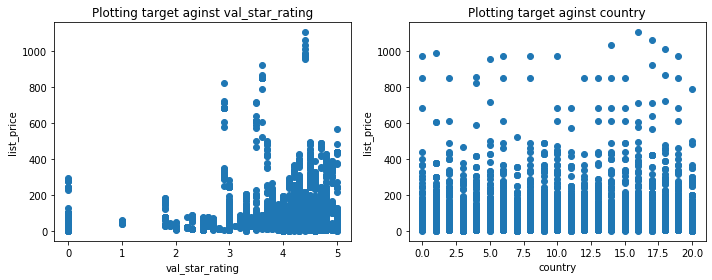

In [ ]:
cols = ['ages', 'list_price', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating',
       'country', 'Id']
for i in range(0,len(cols),2):
    if len(cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        plt.scatter(df_train[cols[i]],df_train["list_price"])
        plt.title('Plotting target aginst '+cols[i])
        plt.xlabel(cols[i])
        plt.ylabel("list_price")
        plt.subplot(122)
        plt.scatter(df_train[cols[i+1]],df_train["list_price"])
        plt.title('Plotting target aginst '+cols[i+1])
        plt.xlabel(cols[i+1])
        plt.ylabel("list_price")
        plt.tight_layout()
        plt.show()
    else:
        sns.boxplot(df_train[cols[i]],df_train["list_price"])

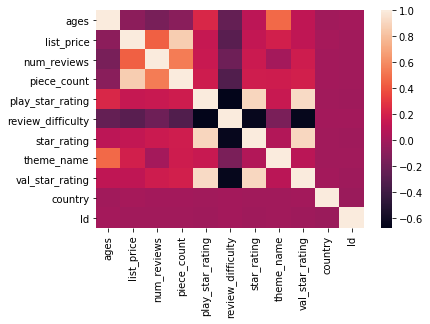

In [4]:
sns.heatmap(df_train.corr())
plt.show()

### Feature Selection
- Try selecting suitable threshold and accordingly drop the columns.

In [35]:
upper_threshold = 0.75
lower_threshold = -0.75

corr = X_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
ages,1.000000,-0.162116,-0.087653,0.230874,-0.248484,0.102732,0.477431,0.119316,-0.016430,0.005607
num_reviews,-0.162116,1.000000,0.550229,0.154845,-0.197409,0.163444,0.017316,0.172836,0.009128,-0.010630
piece_count,-0.087653,0.550229,1.000000,0.171522,-0.312137,0.180946,0.173384,0.194085,0.009986,-0.005375
play_star_rating,0.230874,0.154845,0.171522,1.000000,-0.674571,0.901349,0.149534,0.922697,-0.004127,-0.008526
review_difficulty,-0.248484,-0.197409,-0.312137,-0.674571,1.000000,-0.641694,-0.162326,-0.655544,0.000894,0.011113
star_rating,0.102732,0.163444,0.180946,0.901349,-0.641694,1.000000,0.062220,0.907234,-0.007335,-0.014479
theme_name,0.477431,0.017316,0.173384,0.149534,-0.162326,0.062220,1.000000,0.098476,-0.018460,-0.012110
val_star_rating,0.119316,0.172836,0.194085,0.922697,-0.655544,0.907234,0.098476,1.000000,0.004605,-0.020514
country,-0.016430,0.009128,0.009986,-0.004127,0.000894,-0.007335,-0.018460,0.004605,1.000000,-0.018443
Id,0.005607,-0.010630,-0.005375,-0.008526,0.011113,-0.014479,-0.012110,-0.020514,-0.018443,1.000000


In [36]:
corr_check = corr[((corr>upper_threshold) | (corr<lower_threshold)) & (corr !=1)]
corr_check

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
ages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
piece_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
play_star_rating,NaN,NaN,NaN,NaN,NaN,0.901349,NaN,0.922697,NaN,NaN
review_difficulty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star_rating,NaN,NaN,NaN,0.901349,NaN,NaN,NaN,0.907234,NaN,NaN
theme_name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
val_star_rating,NaN,NaN,NaN,0.922697,NaN,0.907234,NaN,NaN,NaN,NaN
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
X_train.drop(["play_star_rating","val_star_rating"],axis = 1, inplace= True)

In [39]:
X_train.head()

,ages,num_reviews,piece_count,review_difficulty,star_rating,theme_name,country,Id
5994,13,0,85,5,0.0,21,0,5994
2437,11,1,15,2,4.0,13,10,2437
2529,25,4,422,0,4.8,8,20,2529
5865,7,201,1996,1,4.8,34,19,5865
1899,16,18,217,2,2.6,17,3,1899


In [40]:
print(X_val.head())
X_val.shape

      ages  num_reviews  piece_count  play_star_rating  review_difficulty  \
6272    23           18          254               4.2                  2   
1262    19            0          109               0.0                  5   
8379     9            0           41               0.0                  5   
4989     8          337         1334               4.3                  1   
6452     0            1          135               1.0                  4   

      star_rating  theme_name  val_star_rating  country    Id  
6272          4.2          37              4.4       18  6272  
1262          0.0           8              0.0       11  1262  
8379          0.0          13              0.0        8  8379  
4989          4.7           9              4.5        5  4989  
6452          4.0           4              3.0       19  6452  


(2575, 10)

In [42]:
X_val.drop(["play_star_rating","val_star_rating"],axis = 1, inplace= True)
X_val.head()

,ages,num_reviews,piece_count,review_difficulty,star_rating,theme_name,country,Id
6272,23,18,254,2,4.2,37,18,6272
1262,19,0,109,5,0.0,8,11,1262
8379,9,0,41,5,0.0,13,8,8379
4989,8,337,1334,1,4.7,9,5,4989
6452,0,1,135,4,4.0,4,19,6452


### Model building

In [44]:
# Code starts here

regressor = LinearRegression()

regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_val)
y_pred

# Code ends here.

array([46.03110857, 26.64659376, 27.28136806, ..., 54.20354305,
       17.26100206, 35.01180807])

In [4]:
# Code starts here
# Code ends here.

### Residual check!

- Check the distribution of the residual.

Residual : 0.9899006527350855


Text(0.5, 1.0, 'Error Residual plot')

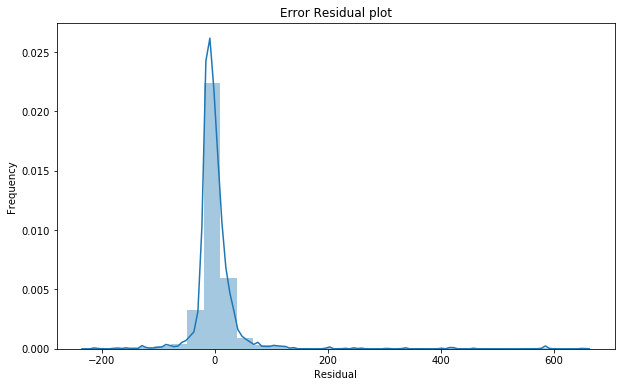

In [48]:
# Code starts here

residual = (y_val - y_pred)
print("Residual :", residual.mean())

plt.figure(figsize=(10,6))
sns.distplot(residual, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency") 
plt.title("Error Residual plot")

# Code ends here.

In [59]:
#Calculate MSE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_val,y_pred)
mae

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val,y_pred)
mse

2385.537404189211

In [52]:
#Calculate R^2
from sklearn.metrics import r2_score

r2 = r2_score(y_val,y_pred)
r2

0.7327803752210251

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [72]:
# Code starts here

df_test = pd.read_csv("test.csv")

df_test.shape

df_test.head()

# Code ends here.

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,26,8,941,4.6,0,4.6,33,4.3,16,9907
1,11,0,19,0.0,5,0.0,13,0.0,7,5243
2,29,34,1376,4.0,1,4.3,34,3.8,12,8276
3,26,0,369,0.0,5,0.0,28,0.0,9,6501
4,11,1,19,3.0,5,4.0,13,4.0,0,1619


In [69]:
id = df_test["Id"]

df_test.drop(["play_star_rating","val_star_rating"],axis = 1, inplace= True)

In [71]:
y_pred_df_test = regressor.predict(df_test)
y_pred_df_test

array([113.79925607,  24.02232249, 148.46260003, ...,  25.84575929,
        16.37954752,  18.27973144])

In [75]:
final_sub = pd.DataFrame({"Id": id, "list_price": y_pred_df_test})
#final_sub

In [76]:
final_sub.to_csv("Lego_Submission.csv", index=False)